## Plant Disease Recognition
This notebook demonstrates training a model to classify plant diseases into Healthy, Powdery, and Rust categories using transfer learning (MobileNetV2).

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import cv2

## Data Preparation

In [7]:
train_dir = 'data/Train/Train'
validation_dir = 'data/Validation/Validation'
test_dir = 'data/Test/Test'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, zoom_range=0.2)
validation_datagen = image.ImageDataGenerator(rescale=1./255)
test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [8]:
import os
print('Training dataset:')
for cls, idx in train_generator.class_indices.items():
    print(f"{len(os.listdir(os.path.join(train_dir, cls)))} images belonging to class '{cls}'")

print('\nValidation dataset:')
for cls, idx in validation_generator.class_indices.items():
    print(f"{len(os.listdir(os.path.join(validation_dir, cls)))} images belonging to class '{cls}'")

print('\nTest dataset:')
for cls, idx in test_generator.class_indices.items():
    print(f"{len(os.listdir(os.path.join(test_dir, cls)))} images belonging to class '{cls}'")

Training dataset:
458 images belonging to class 'Healthy'
430 images belonging to class 'Powdery'
434 images belonging to class 'Rust'

Validation dataset:
20 images belonging to class 'Healthy'
20 images belonging to class 'Powdery'
20 images belonging to class 'Rust'

Test dataset:
50 images belonging to class 'Healthy'
50 images belonging to class 'Powdery'
50 images belonging to class 'Rust'


## Model Creation and Training

In [9]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)



Epoch 1/20


42/42 [==============================] - 257s 6s/step - loss: 0.5721 - accuracy: 0.7784 - val_loss: 0.2140 - val_accuracy: 0.9333
Epoch 2/20
42/42 [==============================] - 219s 5s/step - loss: 0.2079 - accuracy: 0.9448 - val_loss: 0.1455 - val_accuracy: 0.9667
Epoch 3/20
42/42 [==============================] - 223s 5s/step - loss: 0.1468 - accuracy: 0.9622 - val_loss: 0.1238 - val_accuracy: 0.9667
Epoch 4/20
42/42 [==============================] - 179s 4s/step - loss: 0.1175 - accuracy: 0.9735 - val_loss: 0.1040 - val_accuracy: 0.9667
Epoch 5/20
42/42 [==============================] - 185s 4s/step - loss: 0.1037 - accuracy: 0.9720 - val_loss: 0.0896 - val_accuracy: 0.9833
Epoch 6/20
42/42 [==============================] - 181s 4s/step - loss: 0.0984 - accuracy: 0.9781 - val_loss: 0.0823 - val_accuracy: 0.9833
Epoch 7/20
42/42 [==============================] - 193s 5s/step - loss: 0.0850 - accuracy: 0.9796 - val_loss: 0.0933 - val_accuracy: 0.9833
Epoch 8/2

## Fine-tuning

In [10]:
for layer in base_model.layers[-30:]:
    layer.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
42/42 [==============================] - 171s 4s/step - loss: 0.0808 - accuracy: 0.9728 - val_loss: 0.1013 - val_accuracy: 0.9833
Epoch 2/10
42/42 [==============================] - 158s 4s/step - loss: 0.0405 - accuracy: 0.9834 - val_loss: 0.0478 - val_accuracy: 0.9833
Epoch 3/10
42/42 [==============================] - 208s 5s/step - loss: 0.0245 - accuracy: 0.9932 - val_loss: 0.0552 - val_accuracy: 0.9833
Epoch 4/10
42/42 [==============================] - 143s 3s/step - loss: 0.0133 - accuracy: 0.9947 - val_loss: 0.0694 - val_accuracy: 0.9833
Epoch 5/10
42/42 [==============================] - 137s 3s/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0761 - val_accuracy: 0.9833
Epoch 6/10
42/42 [==============================] - 134s 3s/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 7/10
42/42 [==============================] - 139s 3s/step - loss: 0.0098 - accuracy: 0.9985 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 8/10
42

## Evaluation

5/5 [==============================] - 14s 3s/step - loss: 0.4434 - accuracy: 0.9400
Test accuracy: 94.00%
5/5 [==============================] - 13s 2s/step
              precision    recall  f1-score   support

     Healthy       0.40      0.46      0.43        50
     Powdery       0.33      0.30      0.32        50
        Rust       0.28      0.26      0.27        50

    accuracy                           0.34       150
   macro avg       0.34      0.34      0.34       150
weighted avg       0.34      0.34      0.34       150



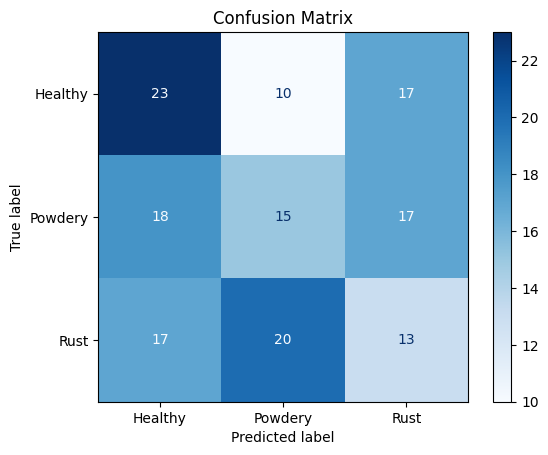

In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Grad-CAM Visualization

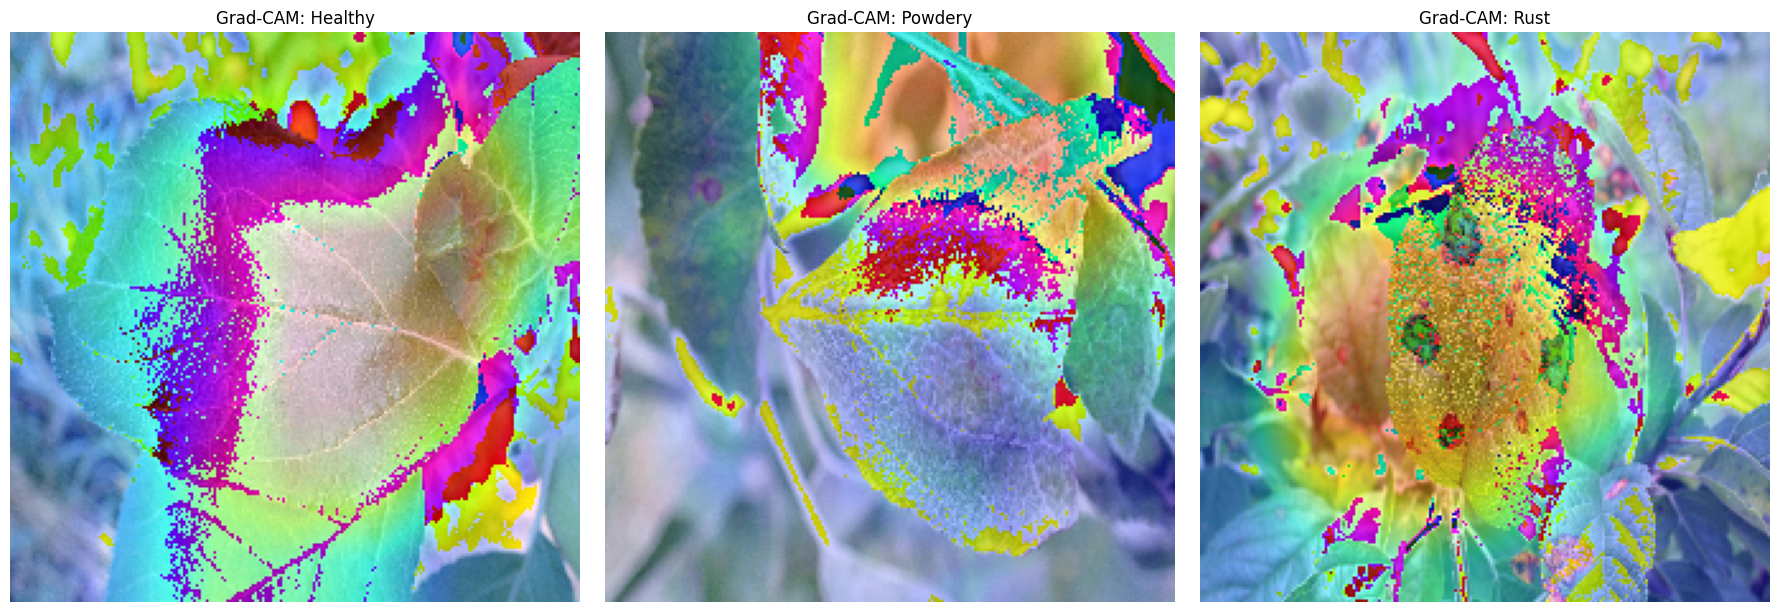

In [15]:
sample_images = {
    "Healthy": "data/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg",
    "Powdery": "data/Test/Test/Powdery/9e0ba1619bdf4943.jpg",
    "Rust": "data/Test/Test/Rust/82add70df6ab2854.jpg"
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

for i, (label, path) in enumerate(sample_images.items()):
    img_array = get_img_array(path, size=(224, 224))
    heatmap = make_gradcam_heatmap(img_array, model, 'Conv_1')

    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4 + img

    axes[i].imshow(cv2.cvtColor(superimposed_img.astype('uint8'), cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Grad-CAM: {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [13]:
model.save('plant_disease_model.keras')